<a href="https://colab.research.google.com/github/HikariZasureiya/HLV25FinanceScript/blob/main/HLV_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTHENTICATE COLAB WITH GOOGLE DRIVE 👾**

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

# **FUNCTIONS HERE 🛠**

In [38]:
def check_pay_status(sheetno: int, nameworksheet, sheetname: str):
    values = nameworksheet.get_all_values()

    headers = [h.strip().upper() for h in values[0]]
    df = pd.DataFrame(values[1:], columns=headers)


    count = 0
    for status in df['PAID']:
        if str(status).strip().upper() == 'Y':
            count += 1

    print(f'Dept: {sheetname}  Paid: {count} / {len(df)}')

In [39]:
def check_roll(proll , nameworksheet , sheetno):
  arr = []
  for i in range(sheetno):
    d={}
    values = nameworksheet[i].get_all_values()
    headers = [h.strip().upper() for h in values[0]]
    df = pd.DataFrame(values[1:], columns=headers)
    try:
      for idx, roll in enumerate(df['ROLL_NUMBER']):
        roll = str(roll).strip()
        d[roll] = df.loc[idx , 'PAID']
      arr.append(d)
    except Exception as e:
      print('error' , e)

  found = False
  for i in arr:
        if proll in i:
            print(proll, i[proll])
            found = True
            break
  if not found:
      print(proll, 'not found')

In [40]:
def tpontp(rolltostream , nameworksheet , sheetno):
  arr = []
  for i in range(sheetno):
    d={}
    values = nameworksheet[i].get_all_values()
    headers = [h.strip().upper() for h in values[0]]
    df = pd.DataFrame(values[1:], columns=headers)
    try:
      for idx, roll in enumerate(df['ROLL_NUMBER']):
        roll = str(roll).strip()
        d[roll] = df.loc[idx , 'PAID']
      arr.append(d)
    except Exception as e:
      print('error' , e)

  for proll in rolltostream:
    found = False
    for i in arr:
        if proll in i:
            print(proll, i[proll])
            found = True
            break
    if not found:
        print(proll, 'not found')




In [41]:
def not_placed(rolltostream , nameworksheet , sheetno):
  arr = []
  for i in range(sheetno):
    d={}
    values = nameworksheet[i].get_all_values()
    headers = [h.strip().upper() for h in values[0]]
    df = pd.DataFrame(values[1:], columns=headers)
    try:
      for idx, roll in enumerate(df['ROLL_NUMBER']):
        roll = str(roll).strip()
        d[roll] = df.loc[idx , 'PAID']
      arr.append(d)
    except Exception as e:
      print('error' , e)

  for proll in rolltostream:
    found = False
    for i in arr:
        if proll in i:
            found = True
            break
    if not found:
        print(proll)

In [42]:
def findit(rolltostream :dict ,sheetno :int , nameworksheet ,sheetname :str):
    values = nameworksheet.get_all_values()
    df = pd.DataFrame(values[1:], columns=values[0])
    tylis = pd.DataFrame(df)

    count = 0
    try:
      for idx, roll in enumerate(tylis['ROLL_NUMBER']):
        try:
          roll = str(roll).strip()
          if pd.notna(roll) and roll in rolltostream:
            count +=1
            # print(f"Sheet {sheetno+1} ➜", idx, roll)
        except Exception as e:
          print(e)
          print(f'inner exception')
    except Exception as e:
        print(e)
        print(f'error in sheet {sheetno} , {sheetname}')
    return count
    # print(f'Dept: {sheetname}  Paid: {count} / {len(df)}')

In [51]:
def writeit(rolltostream :dict ,sheetno :int , nameworksheet ,sheetname :str):
    values = nameworksheet.get_all_values()
    df = pd.DataFrame(values[1:], columns=values[0])
    tylis = pd.DataFrame(df)
    try:
      for idx, roll in enumerate(tylis['ROLL_NUMBER']):
        roll = str(roll).strip()
        if pd.notna(roll) and roll in rolltostream and  tylis.loc[idx , 'PAID'] != 'Y':
          print(f"not found in: Sheet {sheetno+1} ➜", idx, roll)
          row_num = idx+2
          nameworksheet.update_cell(row_num, 3, 'Y')
          nameworksheet.update_cell(row_num, 4, rolltostream[roll][1])
        elif  pd.notna(roll) and roll in rolltostream and tylis.loc[idx , 'PAID'] == 'Y':
          print(f"already paid in: Sheet {sheetno+1} ➜", idx, roll)


    except Exception as e:
        print(e)
        print(f'error in sheet {sheetno} , {sheetname}')
        # wb.close()

# **MAIN ✈🏢🏢**





In [52]:
import pandas as pd
from openpyxl import load_workbook
import datetime
print("last executed" , datetime.datetime.now() , "\n")
#opens hlv'25 collection spreadsheet
sheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1s-E2MnVyXGZSobcnaZ4SqJba0Tao4B2Zdoux6-vu4ZU/edit?gid=1018150263#gid=1018150263")
worksheet = sheet.worksheets()[0]
data = worksheet.get_all_records()
fin = pd.DataFrame(data)
rolltostream ={}
for idx , roll in enumerate(fin['University Roll No']):
    temp = ''
    if(fin.loc[idx , 'Food Preference'] == 'Non Veg'):
        temp = 'NON-VEG'
    elif(fin.loc[idx , 'Food Preference'] == 'Veg'):
        temp = 'VEG'
    rolltostream[str(roll)] = [str(fin.loc[idx , 'Stream']) , temp]
recievedno = len(rolltostream)
print(rolltostream)

last executed 2025-04-28 17:49:55.160138 

{'13000123103': ['CSE', 'NON-VEG'], '13000123101': ['CSE', 'NON-VEG'], '13000123117': ['CSE', 'NON-VEG'], '13000124121': ['CSE', 'NON-VEG'], '13000123124': ['CSE', 'NON-VEG'], '13000123095': ['CSE', 'NON-VEG'], '13000123067': ['CSE', 'NON-VEG'], '13000123113': ['CSE', 'NON-VEG'], '13031124051': ['CSBS', 'NON-VEG'], '13000123110': ['CSE', 'VEG'], '13000123090': ['CSE', 'NON-VEG'], '13000123105': ['CSE', 'NON-VEG'], '13000124159': ['CSE', 'VEG'], '13000123018': ['CSE', 'VEG'], '13000123052': ['CSE', 'NON-VEG'], '13000122039': ['CSE', 'NON-VEG'], '13000124040': ['CSE', 'NON-VEG'], '13000124049': ['CSE', 'NON-VEG'], '13000123062': ['CSE', 'NON-VEG'], '13000124038': ['CSE', 'NON-VEG'], '13000124057': ['CSE', 'NON-VEG'], '13000123084': ['CSE', 'NON-VEG'], '13000123029': ['CSE', 'NON-VEG'], '13000124167': ['CSE', 'NON-VEG'], '13000124155': ['CSE', 'VEG'], '13000124160': ['CSE', 'NON-VEG'], '13000122008': ['CSE', 'VEG'], '13000122124': ['CSE', 'NON-VE

# **find placed vs total responses 👽**

In [53]:
namelist = gc.open_by_url("https://docs.google.com/spreadsheets/d/1We74wo0hkN73b2Wa3hqtgoqnNAGFtPjls4_NiwkRGwc/edit?gid=1031123412#gid=1031123412")
nameworksheet = namelist.worksheets()
sheetno = len(nameworksheet)
placed = 0
for i in range(0,sheetno):
  tempo = findit(rolltostream , i , nameworksheet[i] , nameworksheet[i].title)
  placed += tempo
print(f'Total Placed: {placed} / {recievedno}')

Total Placed: 128 / 144


# **Run this to modify the sheet(Check stuff a bit too if you can) ⏰**

In [54]:
# execute to modify sheet (make sure if the sheet has okay format first)
for i in range(0,sheetno):
  writeit(rolltostream , i , nameworksheet[i] , nameworksheet[i].title)

already paid in: Sheet 1 ➜ 39 13000124038
already paid in: Sheet 1 ➜ 41 13000124040
already paid in: Sheet 1 ➜ 43 13000124042
already paid in: Sheet 1 ➜ 50 13000124049
already paid in: Sheet 1 ➜ 58 13000124057
already paid in: Sheet 2 ➜ 4 13000124063
already paid in: Sheet 2 ➜ 12 13000124071
already paid in: Sheet 2 ➜ 14 13000124073
already paid in: Sheet 2 ➜ 16 13000124075
already paid in: Sheet 2 ➜ 21 13000124080
already paid in: Sheet 2 ➜ 22 13000124081
already paid in: Sheet 2 ➜ 23 13000124082
already paid in: Sheet 2 ➜ 24 13000124083
already paid in: Sheet 2 ➜ 27 13000124086
already paid in: Sheet 2 ➜ 28 13000124087
already paid in: Sheet 2 ➜ 49 13000124108
already paid in: Sheet 2 ➜ 58 13000124117
already paid in: Sheet 3 ➜ 2 13000124121
already paid in: Sheet 3 ➜ 14 13000124133
already paid in: Sheet 3 ➜ 19 13000124138
already paid in: Sheet 3 ➜ 20 13000124139
already paid in: Sheet 3 ➜ 23 13000124142
already paid in: Sheet 3 ➜ 25 13000124144
already paid in: Sheet 4 ➜ 12 130001

# List no. of payment / tot. students  

In [55]:
#check for payment status of all depts
for i in range(0,sheetno):
  check_pay_status(i , nameworksheet[i] , nameworksheet[i].title)

Dept: 1Y - CSE -A  Paid: 5 / 60
Dept: 1Y - CSE - B  Paid: 12 / 60
Dept: 1Y -CSE-C  Paid: 8 / 36
Dept: 2Y - CSE- A  Paid: 10 / 71
Dept: 2Y - CSE- B  Paid: 42 / 70
Dept: 3Y - CSE - A  Paid: 15 / 69
Dept: 3Y - CSE- B  Paid: 12 / 73
Dept: 1Y - CSBS  Paid: 20 / 74
Dept: 2Y - CSBS  Paid: 8 / 61
Dept: 3Y - CSBS  Paid: 7 / 65
Dept: Sheet10  Paid: 0 / 37


# check status of rollno in response against sheet
# **use caution while executing. might rate limit api usage** ☠

In [56]:
# check status of rollno in response against sheet
# use caution while executing. might rate limit api usage
tpontp(rolltostream , nameworksheet , sheetno)

13000123103 Y
13000123101 Y
13000123117 Y
13000124121 Y
13000123124 Y
13000123095 Y
13000123067 Y
13000123113 Y
13031124051 Y
13000123110 Y
13000123090 Y
13000123105 Y
13000124159 Y
13000123018 Y
13000123052 Y
13000122039 Y
13000124040 Y
13000124049 Y
13000123062 Y
13000124038 Y
13000124057 Y
13000123084 Y
13000123029 Y
13000124167 Y
13000124155 Y
13000124160 Y
13000122008 Y
13000122124 Y
13000123104 Y
13000123063 Y
13000124158 Y
13000124163 Y
13000123083 Y
13000123106 Y
13000123108 Y
13000123118 Y
13000123099 Y
2320071001 not found
13000124162 Y
13000123082 Y
13000123114 Y
13000123109 Y
13000123116 Y
13000123102 Y
13000123088 Y
13000123112 Y
13000123123 Y
13000124087 Y
13031124040 Y
13000122101 Y
13000123098 Y
13031123024 Y
13000122120 Y
13031123056 Y
13031122017 Y
13031123002 Y
13031124069 Y
13000123071 Y
13000123012 Y
13000123054 Y
13000124138 Y
13000124144 Y
13031123013 Y
13000122121 Y
13000122115 Y
13000122070 Y
13000122093 Y
13000122080 Y
13000122098 Y
13000123022 Y
13031123055 Y

In [57]:
#guys who didn't get placed in the sheet
not_placed(rolltostream , nameworksheet , sheetno)

2320071001
2220071017
2220071013
DTIPCSTS4
D242506913
D242506914
D242506910
D232431087
ID-2220076004
D232431124
DTIPCST1 10011675
10022695
D232431121
2320071037
D232431113
2320071038


In [ ]:
#check if rollno present
# use caution while executing. might rate limit api usage
rollinp = input()
check_roll(rollinp , nameworksheet , sheetno)

# **Honourable Mentions**
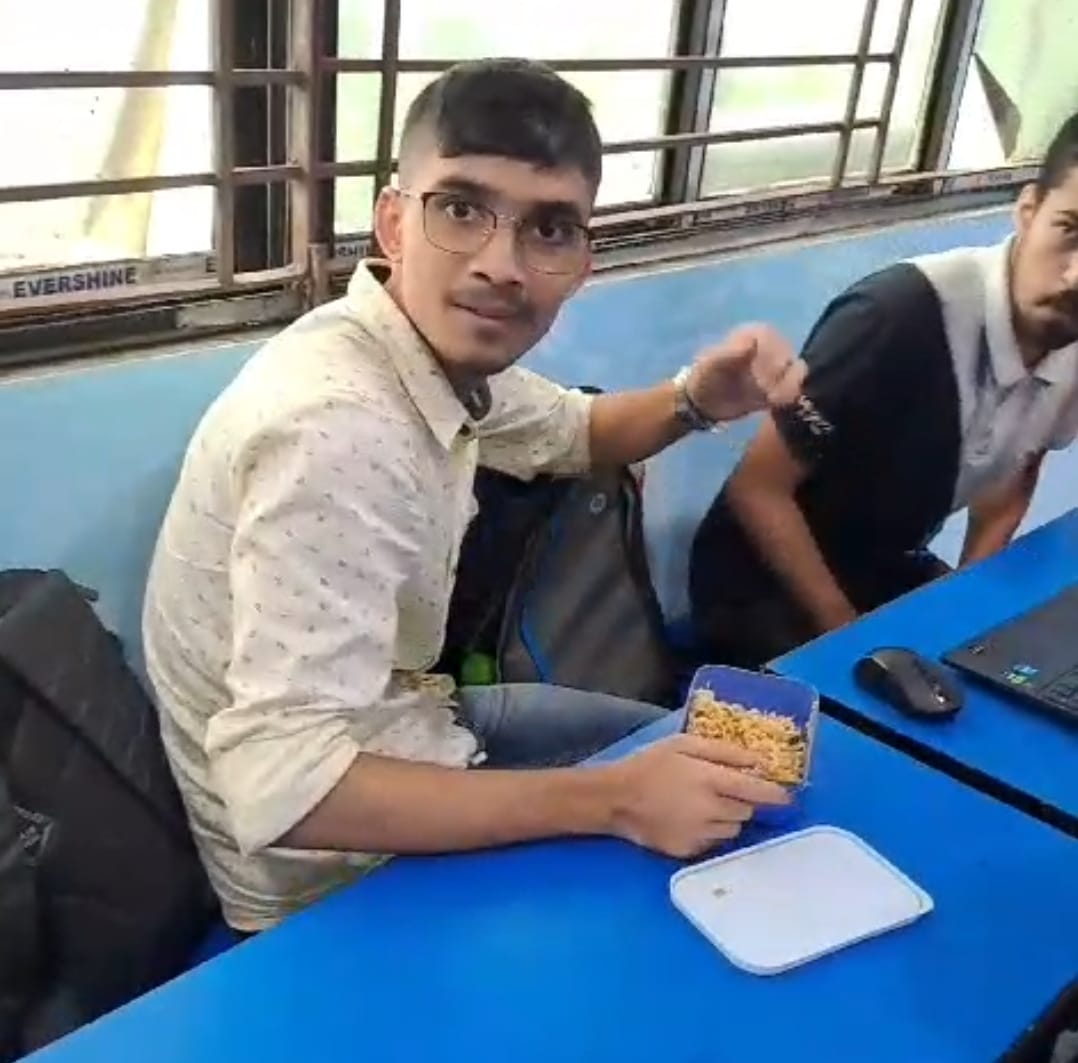
